# Loadin Dataset


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#read the dataset
df = pd.read_csv('train_dataset.csv')

# drop the column named label of the dataset
df = df.drop(['label'], axis=1)
 
#check the shape of the dataset
print("INFO:", df.shape[0])

#check duplicates in the dataset
print("Duplicates: ", df.duplicated().sum())

#check null values
print("Null values: ", df.isnull().sum().sum())

#count every field of the dataframe that has - as value
print("Fields with - as value: ", (df == '-').sum().sum())

#check the unique values of the dataset
print("Unique values: ", df.nunique())

# Identify categorical columns
print("categorical columns")
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

#check for each column if the values is
for col in df.columns:
    print(col, (df[col] == '-').sum())

#use binning to subsitute the value of every variable that has - in the dataset
# Replace '-' with NaN
df.replace('-', np.nan, inplace=True)

# Fill NaN values with the mean of the column for numerical columns
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)





C:\Users\rinal\AppData\Local\Temp\ipykernel_20704\4134348716.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train_dataset.csv')


INFO: 617002
Duplicates:  0
Null values:  0
Fields with - as value:  13791661
Unique values:  ts                        151968
src_ip                       818
src_port                   57822
dst_ip                      1678
dst_port                   47556
proto                          3
service                       23
duration                  209355
src_bytes                   4355
dst_bytes                   3897
conn_state                    13
missed_bytes                1299
src_pkts                     447
src_ip_bytes                4598
dst_pkts                     137
dst_ip_bytes                4066
dns_query                   2231
dns_qclass                     3
dns_qtype                     11
dns_rcode                      4
dns_AA                         3
dns_RD                         3
dns_RA                         3
dns_rejected                   3
ssl_version                    5
ssl_cipher                     7
ssl_resumed                    3
ssl_established

C:\Users\rinal\AppData\Local\Temp\ipykernel_20704\4134348716.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)
C:\Users\rinal\AppData\Local\Temp\ipykernel_20704\4134348716.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inp

In [10]:
#label encoder
le = LabelEncoder()

# Convert categorical columns to numeric
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

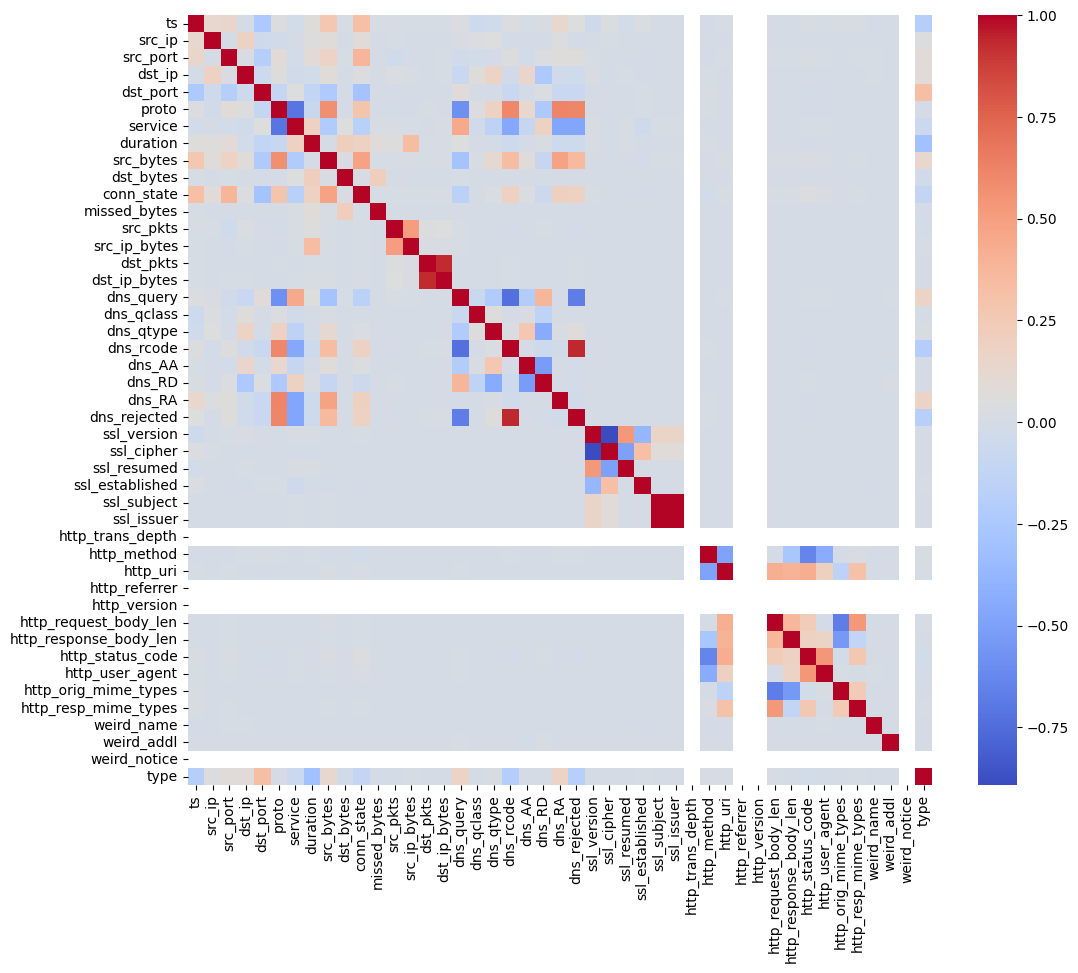

In [11]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()



import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')


# Show the plot
plt.show()




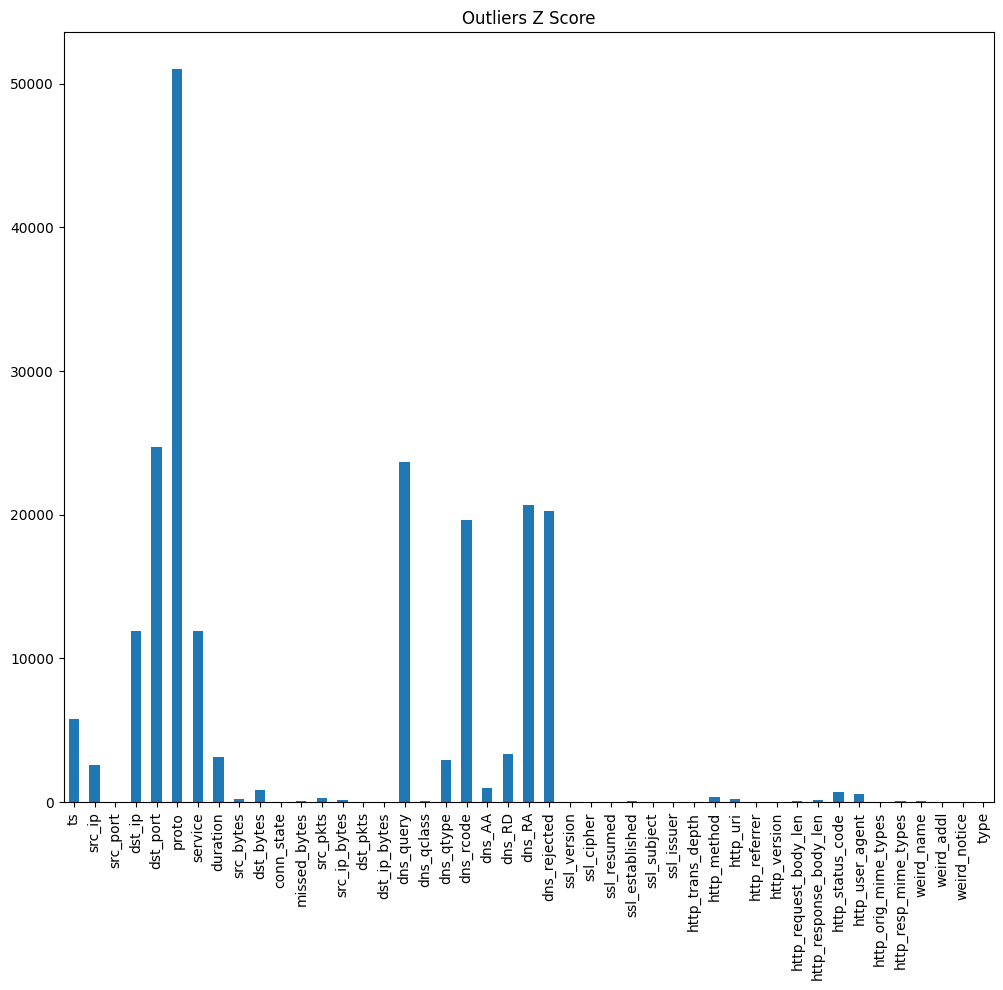

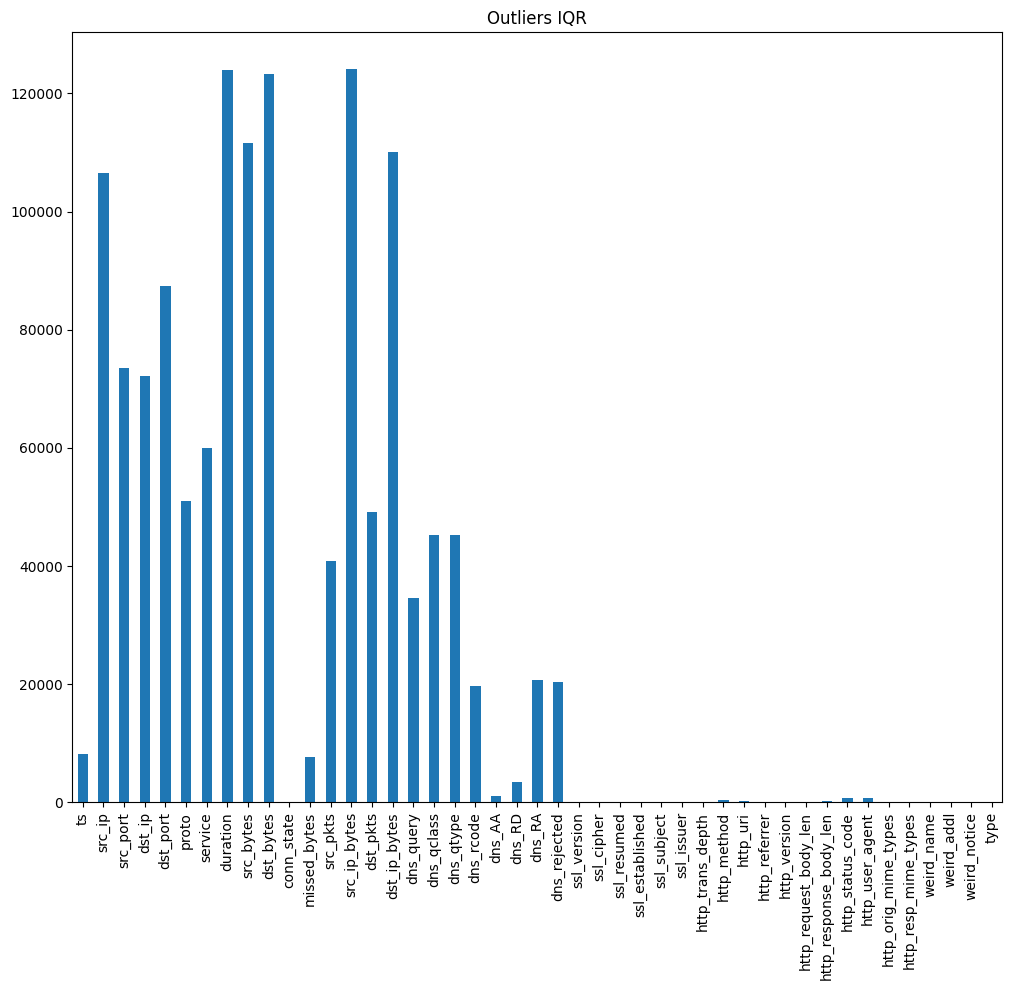


Variance of Each Column:
ts                        4.861558e+10
src_ip                    2.871158e+02
src_port                  2.959377e+08
dst_ip                    1.812020e+04
dst_port                  2.098803e+08
proto                     7.613376e-02
service                   5.062025e+00
duration                  1.132491e+03
src_bytes                 1.244221e+06
dst_bytes                 1.166262e+15
conn_state                1.248005e+01
missed_bytes              1.102075e+14
src_pkts                  7.453572e+03
src_ip_bytes              2.834781e+08
dst_pkts                  4.120077e+05
dst_ip_bytes              1.999337e+09
dns_query                 2.626545e+04
dns_qclass                1.252912e+05
dns_qtype                 3.656795e+01
dns_rcode                 2.779898e-01
dns_AA                    1.561571e-03
dns_RD                    5.454513e-03
dns_RA                    3.243440e-02
dns_rejected              3.179135e-02
ssl_version               1.961036e-04

In [ ]:
# Check for outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

#use z score to detect outliers
from scipy import stats
z = np.abs(stats.zscore(df))
outliers_z = (z > 3).sum()

#do plot for z score outliers
plt.figure(figsize=(12, 10))
outliers_z.plot(kind='bar',title='Outliers Z Score')


#use an histogram to show the outliers
plt.figure(figsize=(12, 10))
outliers_IQR.plot(kind='bar',title='Outliers IQR')
plt.show()

# Check variance of each column
print("\nVariance of Each Column:")
print(df.var(axis=0))